## 1. Setup

In [1]:
import pandas

import pandas as pd

import matplotlib.pyplot as plt

#Loading dataset
data = pandas.read_csv("california_house.csv") #A dataset with atleast 5 predictor

In [2]:
data.shape

(20640, 9)

In [3]:
data.describe() #Described the dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
data.head(5) #Display the first 5 rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
data.info() #Information about the predictors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
#Manually constructing an evaluation set with 5 datapoints and 4 predictors
#2 dimensional data structure with random predictor data
evaluation_set = pd.DataFrame({
    'MedInc': [3.578, 6.056, 4.17, 2.898, 5.256],
    'HouseAge': [15.0, 25.0, 30.0, 18.0, 50.0],
    'AveRooms': [4.643, 3.256, 2.546, 0.987, 1.978],
    'AveBedrms': [1.678, 0.579, 2.786, 1.123, 3.678]
})

#This will later be utilized to assess models and perform predictions
print(evaluation_set) # Displaing the evaluation data set


   MedInc  HouseAge  AveRooms  AveBedrms
0   3.578      15.0     4.643      1.678
1   6.056      25.0     3.256      0.579
2   4.170      30.0     2.546      2.786
3   2.898      18.0     0.987      1.123
4   5.256      50.0     1.978      3.678




## 2. Simple Linear Regression

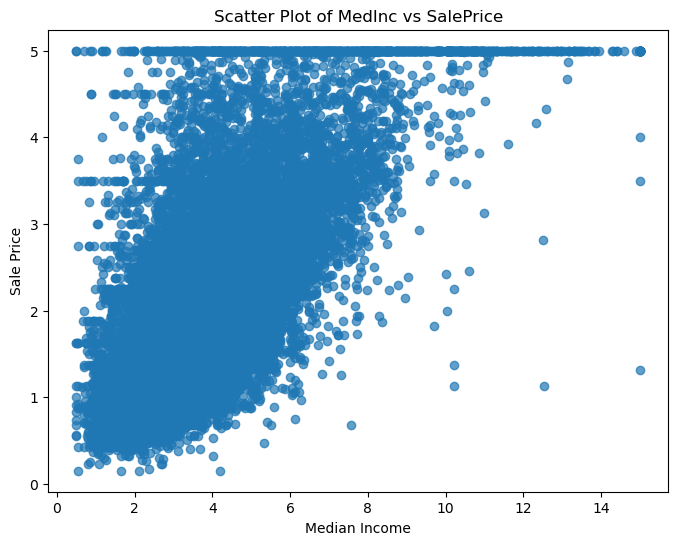

In [7]:
# MedInc is preditor X
# SalePrice is target Y

X = data['MedInc'] #Median Income
Y = data['SalePrice'] #Sale Price

# Create a scatter plot MedInc vs SalePrice
plt.figure(figsize=(8, 6))
plt.scatter(data['MedInc'], data['SalePrice'], alpha = 0.7)
plt.xlabel('Median Income')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of MedInc vs SalePrice')
plt.show()


In [8]:
#Use the statsmodels.api library to fit a linear regression model
import statsmodels.api as sm

X = sm.add_constant(X) 

#Regression model
model = sm.OLS(Y, X).fit()

#Model's summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:37:36   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.0

R-squred value will indicate the proportion of the variance in sale price and changes with a unit increase in MedInc. Here, Sale Price is target value and medInc is predictor. The number of observation is 20640. R-squared is 0.473 which indicates that 47.3% of the variance in sale price can be explained by MedInc. Also, it depicts that 52.7% of the variation is not explaind by this predictor alone.

The coefficient for MedInc will show how much the SalePrice changes with a MedInc unit increase. The intercept value is 0.4509, indicating that when MedInc = 0, SalePrice is approximately 0.4509. Furthermore, the MedInc coefficient is 0.4179, which means that for every unit increase in MedInc, the sale price rises by 0.4179. MedInc has a positive relationship with SalePrice.

Using the coefficients from the model summary, we can write the regression equation.
SalePrice = β0 + β1 * MedInc
where,the intercept is β0 and the coefficient for MedInc is β1.

In [9]:
# Use the model to predict SalePrice for the evaluation set
evaluation = sm.add_constant(evaluation_set['MedInc'])
evaluation_set['Predicted_SalePrice']= model.predict(evaluation)

# Display the evaluation set with predictions
evaluation_set


,MedInc,HouseAge,AveRooms,AveBedrms,Predicted_SalePrice
0,3.578,15.0,4.643,1.678,1.946240
1,6.056,25.0,3.256,0.579,2.981891
2,4.170,30.0,2.546,2.786,2.193659
3,2.898,18.0,0.987,1.123,1.662042
4,5.256,50.0,1.978,3.678,2.647540


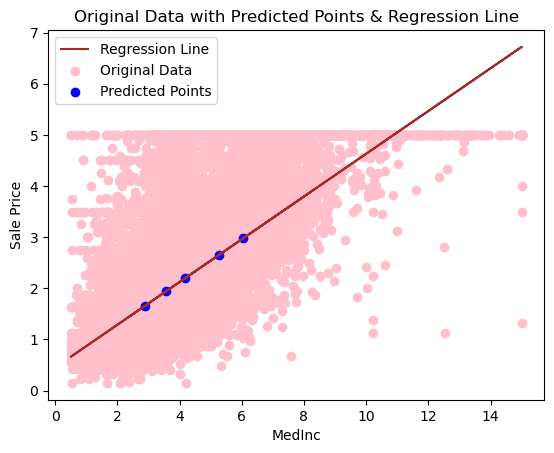

In [10]:
# Scatter plot for original data
plt.scatter(data['MedInc'], data['SalePrice'], label='Original Data', color = 'pink')

# Add regression line to the scattered plot
slope = model.params[1]  
intercept = model.params[0] 
regression_line = slope * data['MedInc'] + intercept
plt.plot(data['MedInc'], regression_line, color='brown', label='Regression Line')

# Predict the target value for the evaluation set and overlay these on the scatter plot with a different color
plt.scatter(evaluation_set['MedInc'], evaluation_set['Predicted_SalePrice'], color='blue', label='Predicted Points')

plt.xlabel('MedInc')
plt.ylabel('Sale Price')
plt.title('Original Data with Predicted Points & Regression Line')
plt.legend()
plt.show()


## 3. Multicollinearity

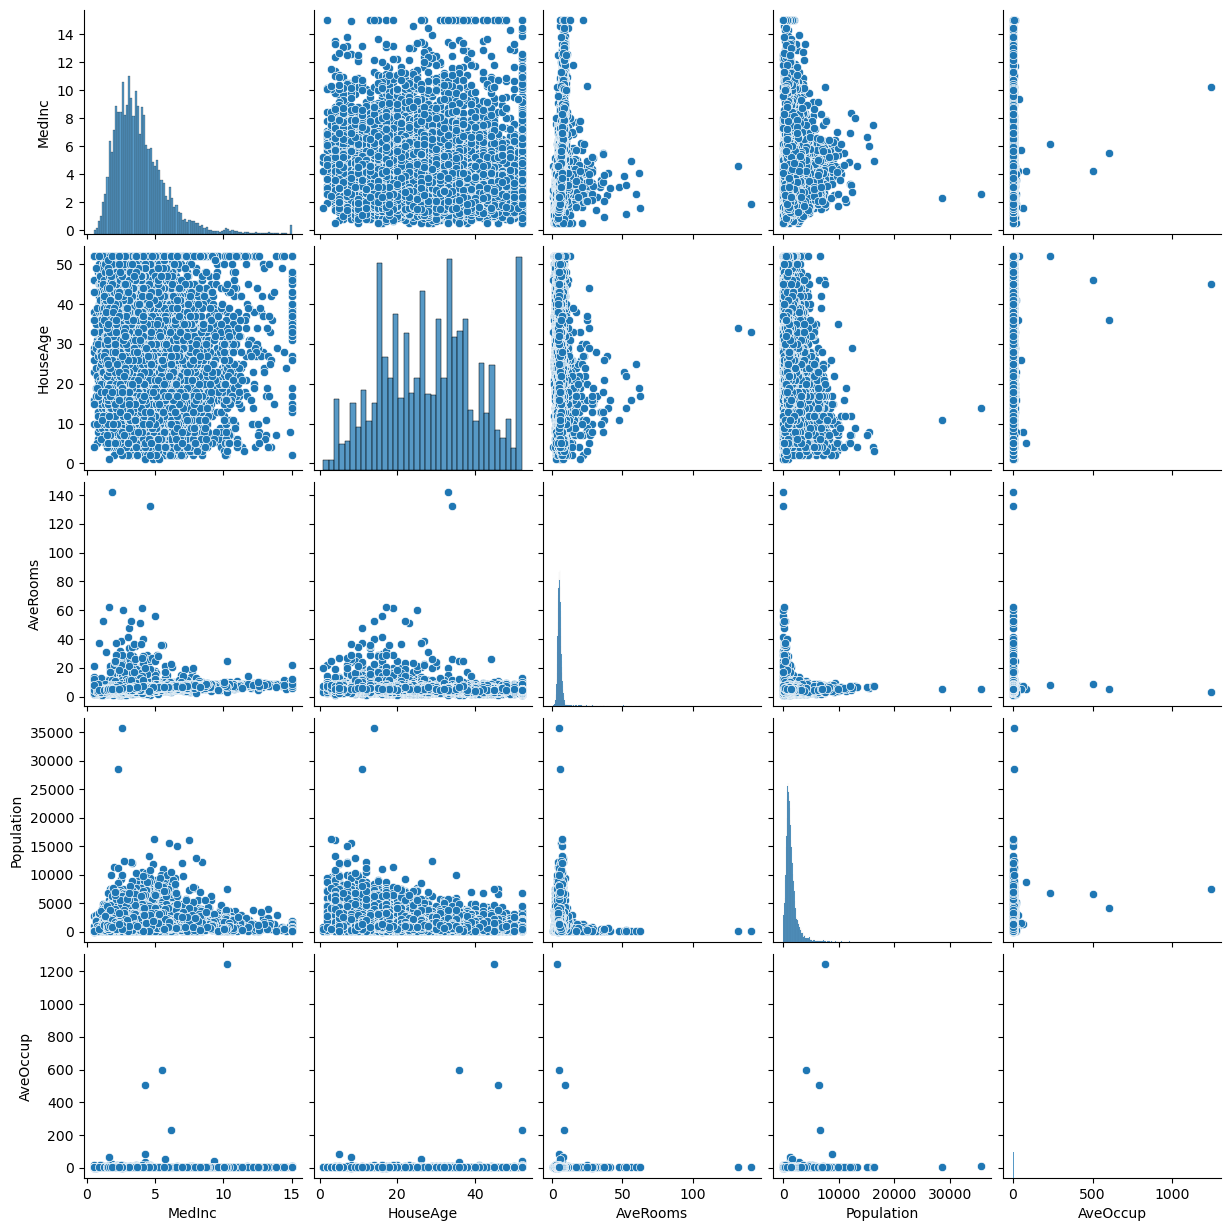

In [11]:
import seaborn as sns

subset_data = data[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup']]

# Scatter Plot Matrix
sns.pairplot(subset_data)
plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant column for VIF calculation
X_vif = sm.add_constant(subset_data)

# Calculating VIF(Variance Inflation Factor) for predictors
vif_data = pd.DataFrame()
vif_data["Predictor"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, k) for k in range(X_vif.shape[1])]

print(vif_data)

    Predictor        VIF
0       const  20.879634
1      MedInc   1.126389
2    HouseAge   1.141196
3    AveRooms   1.153336
4  Population   1.120262
5    AveOccup   1.006712


All VIF (Variance Inflation Factor) values for the predictors are less than 5, which indicates that no significant multicollinearity exists among these predictors. MedInc has a VIF of 1.126 and it is as low as the other value. It does not indicate any collinearity issue.

None of the predictors show high multicollinearity. All VIF values are close to 1, so, the predictors are not highly correlated with each other. Basically, the model's predictors are well-conditioned for regression analysis.

The VIF for the constant is 20.88 which is quite high, however this is not a reason for concern because it does not directly contribute to predictor multicollinearity.


## 4. Multiple Linear Regression

In [13]:
# Using statsmodels.api to fit a linear model with the new predictors
import statsmodels.api as sm

y = data['SalePrice']  
# Target
x = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']]  
# 3 additional predictors except for MedInc
x = sm.add_constant(x)

#model
multiple_model = sm.OLS(y, x).fit()

#Model's summary
print(multiple_model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     5995.
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:37:56   Log-Likelihood:                -24284.
No. Observations:               20640   AIC:                         4.858e+04
Df Residuals:                   20635   BIC:                         4.862e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3958      0.025    -16.012      0.0

In simple linear regression, the R-squared value is 0.473, indicating that  47.3% of the variance in the target variable (SalePrice) can be explained by the single predictor (MedInc). On the other hand, the R-squared value in multiple linear regression is 0.537, indicating that 53.7% of the variance in SalePrice can be explained by multiple predictors. The increase in R^2 indicates that the additional predictors are contributing valuable information to improve the prediction. However, the gain is relatively low. Thus, the model with multiple predictors performs better than the simple linear model, but the improvement isn't huge. It shows that MedInc remains a strong individual predictor, but other variables like HouseAge, AveRooms & AveBedrms also helped to improved the model.

Multiple Linear Regression Equations:
SalePrice = β0 + β1 * MedInc + β2 * HouseAge + β3 * AveRooms + β4 * AveBedrms. 
Here,
Intercept (const) β0,
MedInc coefficient β1,
HouseAge coefficient β2,
AveRooms coefficient β3,
AveBedrms coefficient β4.

In [14]:
# Predict the target values for the evaluation set based on the new model
evaluation_set_X = sm.add_constant(evaluation_set[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']])
evaluation_set['Predicted_SalePrice_Multiple'] = multiple_model.predict(evaluation_set_X)

print(evaluation_set)

   MedInc  HouseAge  AveRooms  AveBedrms  Predicted_SalePrice  \
0   3.578      15.0     4.643      1.678             1.946240   
1   6.056      25.0     3.256      0.579             2.981891   
2   4.170      30.0     2.546      2.786             2.193659   
3   2.898      18.0     0.987      1.123             1.662042   
4   5.256      50.0     1.978      3.678             2.647540   

   Predicted_SalePrice_Multiple  
0                      2.441530  
1                      3.131163  
2                      4.545357  
3                      2.350692  
4                      6.452758  


## 5. Logistic Regression

In [15]:
med_price = data['SalePrice'].median()
data['HighPrice'] = (data['SalePrice'] > med_price).astype(int)

x = data[['MedInc', 'HouseAge']] #predictor
y = data['HighPrice'] #binary target


In [16]:
#Add constant 
x = sm.add_constant(x)

#Logistic regression model
logistic_model = sm.Logit(y, x)
result = logistic_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.485024
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              HighPrice   No. Observations:                20640
Model:                          Logit   Df Residuals:                    20637
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.3003
Time:                        21:37:58   Log-Likelihood:                -10011.
converged:                       True   LL-Null:                       -14307.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2544      0.084    -62.334      0.000      -5.420      -5.089
MedInc         1.1254      0.

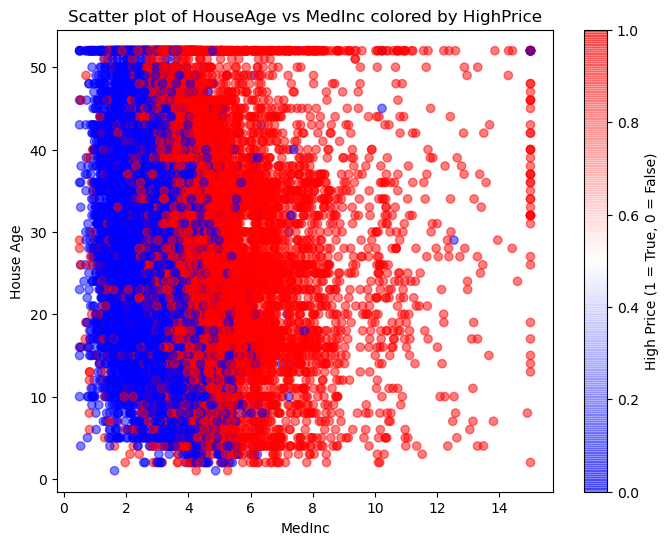

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(data['MedInc'], data['HouseAge'], c = data['HighPrice'], cmap = 'bwr', alpha=0.5)
plt.xlabel('MedInc')
plt.ylabel('House Age')
plt.title('Scatter plot of HouseAge vs MedInc colored by HighPrice')
plt.colorbar(label='High Price (1 = True, 0 = False)')
plt.show()


In [18]:
coefficients = result.params
print(coefficients)

const      -5.254355
MedInc      1.125429
HouseAge    0.039305
dtype: float64


Intercept (const) = -5.254355
MedInc coefficient = 1.125429
HouseAge coefficient = 0.039305

Log(P/1-P) = -5.254355 + 1.125429 * MedInc + 0.039305 * HouseAge.

In [19]:
evaluation_set = sm.add_constant(evaluation_set)
print(evaluation_set.head())

   const  MedInc  HouseAge  AveRooms  AveBedrms  Predicted_SalePrice  \
0    1.0   3.578      15.0     4.643      1.678             1.946240   
1    1.0   6.056      25.0     3.256      0.579             2.981891   
2    1.0   4.170      30.0     2.546      2.786             2.193659   
3    1.0   2.898      18.0     0.987      1.123             1.662042   
4    1.0   5.256      50.0     1.978      3.678             2.647540   

   Predicted_SalePrice_Multiple  
0                      2.441530  
1                      3.131163  
2                      4.545357  
3                      2.350692  
4                      6.452758  


In [20]:
# Create an evaluation set
evaluation_set_2 = pd.DataFrame({
    'MedInc': [2.68, 3.077, 5.768, 6.787, 4.789],  
    'HouseAge': [5.78, 15.78, 20.676, 7.89, 52.90]     
})

evaluation_set = sm.add_constant(evaluation_set_2)
predicted_probabilities = result.predict(evaluation_set)

#Predict the probability of the target for each point in the evaluation set.
print(predicted_probabilities)


0    0.118051
1    0.236643
2    0.885927
3    0.936675
4    0.901550
dtype: float64


In [21]:
#Done